# EDA Application with a Real Data Set - Draft Version 1
## https://www.kaggle.com/c/santander-customer-satisfaction

## Data Set

- Santander Bank is asking to help identify dissatisfied customers in their relationship with hundreds of anonymized features. Please visit the website and read details about it.

- 743 columns (ID, TARGET, and features), 76020 rows: train and test data sets.

- The "TARGET" column is the variable to predict. It equals one for unsatisfied customers and 0 for satisfied customers.

- Data file descriptions:

        train.csv - the training set including the target
        test.csv - the test set without the target
        sample_submission.csv - a sample submission file in the correct format


## Goal

- The task: 
    1. to describe the data set
        - data type for each column 
        - missingness
        - univariate summaries
        - bivariate summaries
            - associations
            - correlations
            - patterns
        - multivariate summaries
        - more
    2. to predict the probability that each customer in the test set is an unsatisfied customer.
    3. to predict if a customer is satisfied or dissatisfied with their banking experience.


## Housekeeping

Know: 
- where you are working
- version check
- shorcuts: https://youtu.be/d0oBRIONOEw

Basic packs to use:
- numpy
- pandas
- seaborn
- matplotlib

In [20]:
# Directory working
%pwd  #look at the current work dir
#%cd

'/Users/yusufbilgic'

### Step 1: Source and load the data

In [15]:
# Import necessary libraries and load the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Check version
import pandas as pd
pd.__version__

'1.1.2'

In [2]:
# Baurjan's importing code
import boto3
client = boto3.client('s3')
train_path = 's3://classdataset/train.csv'
test_path = 's3://classdataset/test.csv'
train= pd.read_csv(train_path)
test = pd.read_csv(test_path)

ImportError: Pandas requires version '0.7.4' or newer of 'fsspec' (version '0.6.2' currently installed).

In [22]:
#import data from directory
train = pd.read_csv("Documents/GitHub/ML/santander-customer-satisfaction/train.csv", index_col='ID') # the train dataset is now a Pandas DataFrame
test = pd.read_csv("Documents/GitHub/ML/santander-customer-satisfaction/test.csv", index_col='ID') # the train dataset is now a Pandas DataFrame

### Step 2: Data Wrangling 

In [23]:
# We will use train data set for EDA
# Look the number of rows and columns
train.shape

(76020, 370)

In [8]:
# Check out the data types, number of entries and other details
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76020 entries, 1 to 151838
Columns: 370 entries, var3 to TARGET
dtypes: float64(111), int64(259)
memory usage: 215.2 MB


In [7]:
# Check out the first 5 rows of the data set
train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [9]:
# Given we couldn't see NaNs from the df.info(), let's do this another way
train.isnull().sum().nlargest()

var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
imp_op_var39_comer_ult3    0
dtype: int64

In [10]:
# Number of columns with all zeros as average
np.sum(train.mean()==0)

34

In [11]:
# Columns with all zeros
zero_mean = (train.mean()==0).to_frame(name='ZeroMean')

In [13]:
zero_mean = zero_mean.loc[zero_mean.ZeroMean]
print(zero_mean)

                               ZeroMean
ind_var2_0                         True
ind_var2                           True
ind_var27_0                        True
ind_var28_0                        True
ind_var28                          True
ind_var27                          True
ind_var41                          True
ind_var46_0                        True
ind_var46                          True
num_var27_0                        True
num_var28_0                        True
num_var28                          True
num_var27                          True
num_var41                          True
num_var46_0                        True
num_var46                          True
saldo_var28                        True
saldo_var27                        True
saldo_var41                        True
saldo_var46                        True
imp_amort_var18_hace3              True
imp_amort_var34_hace3              True
imp_reemb_var13_hace3              True
imp_reemb_var33_hace3              True


In [15]:
# We can get rid of the columns with all zeros, there is no information to gain from them
remove_features = list(zero_mean.index)
print(remove_features)

['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46', 'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3', 'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3', 'num_reemb_var33_hace3', 'num_trasp_var17_out_hace3', 'num_trasp_var33_out_hace3', 'saldo_var2_ult1', 'saldo_medio_var13_medio_hace3']


In [16]:
train = train.drop(remove_features, axis=1)
train.shape

(76020, 336)

Notice the number of columns that decreased from original 371 to 337

In [17]:
# Number of columns with all zeros
np.sum(train.mean()==0)

0

In [18]:
# Let's look at classes of the target 
train['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [19]:
# Happy customers: TARGET==0 vs Unhappy custormers: TARGET==1
df = pd.DataFrame(train.TARGET.value_counts())
df['Percentage'] = 100*df['TARGET']/train.shape[0]
df

,TARGET,Percentage
0,73012,96.043147
1,3008,3.956853


### Discover data related issues, type issues, all issues before running EDA

In [39]:
# See one -999999 in var3
train.var3.value_counts() #all
train.var3.value_counts()[:10] #first 10 levels

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64

In [40]:
# Dig into issues and redefine
train.loc[train.var3==-999999].shape


(116, 336)

In [41]:
# Replace -999999 with 0
train = train.replace(-999999,0)
train.loc[train.var3==-999999].shape

(0, 336)

### Your observations and issues?

Task.


### Step 3: Exploratory Data Analysis (EDA) with Basic Functions

In [20]:
train.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,8237.820000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


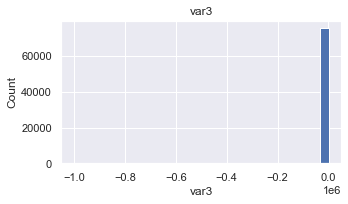

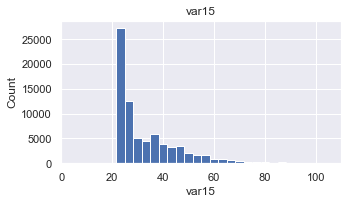

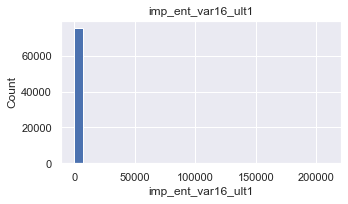

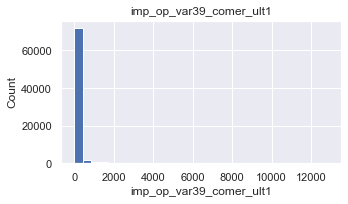

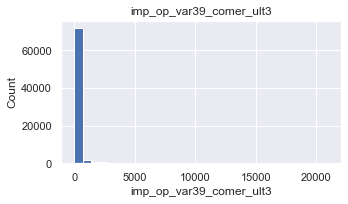

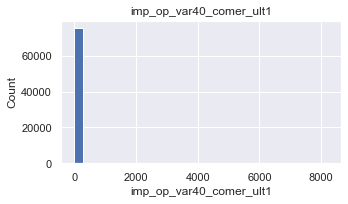

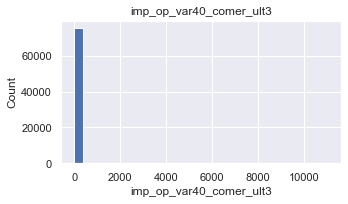

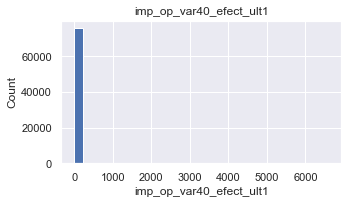

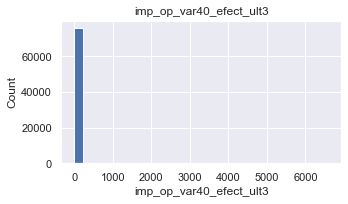

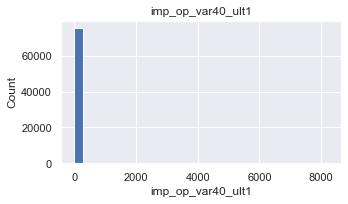

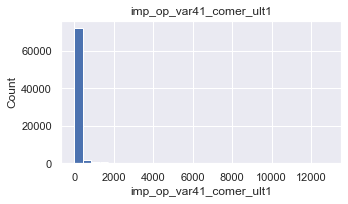

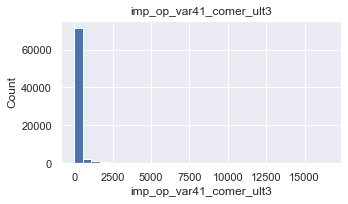

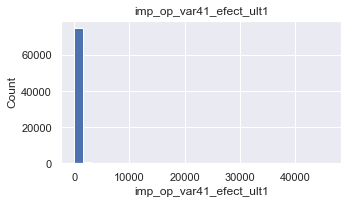

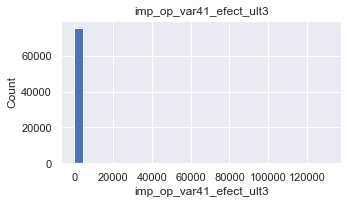

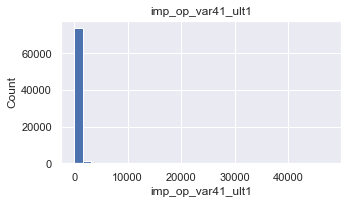

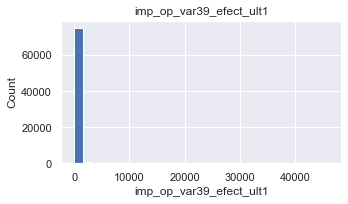

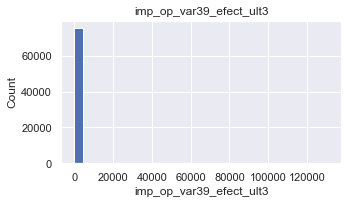

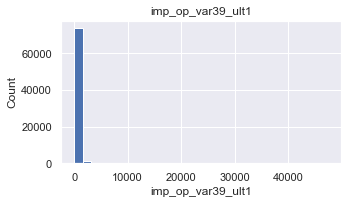

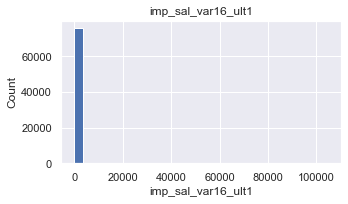

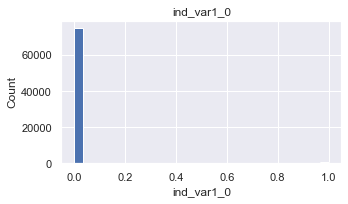

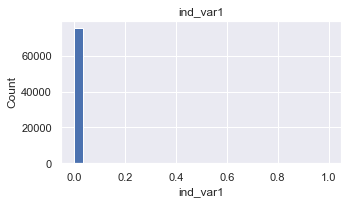

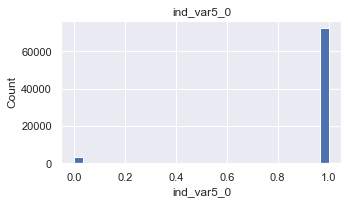

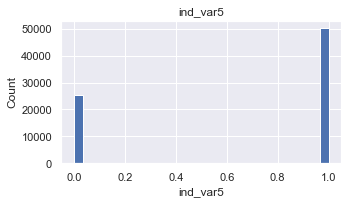

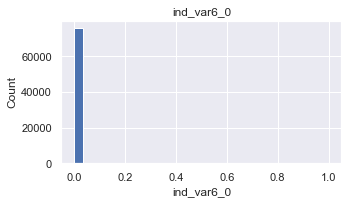

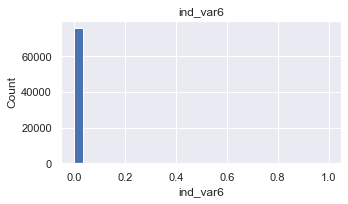

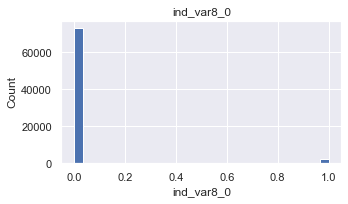

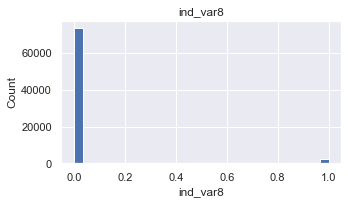

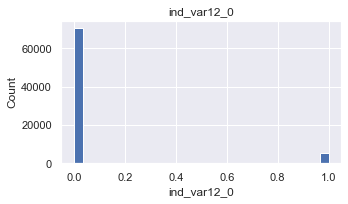

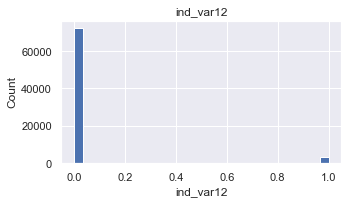

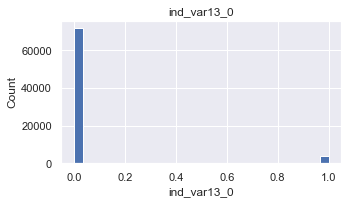

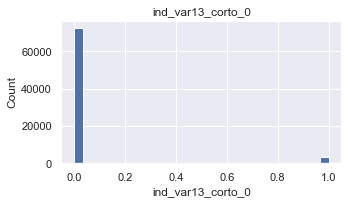

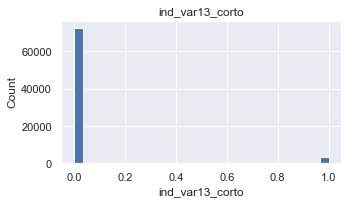

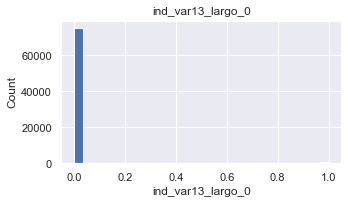

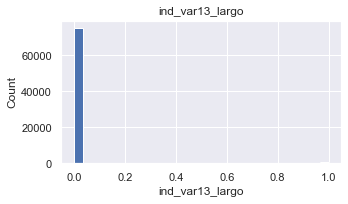

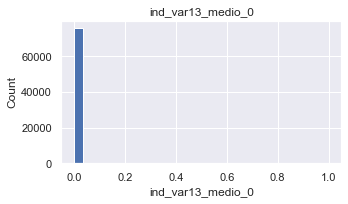

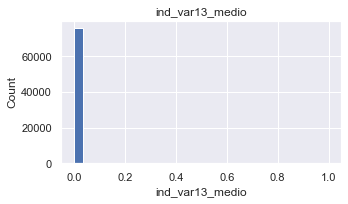

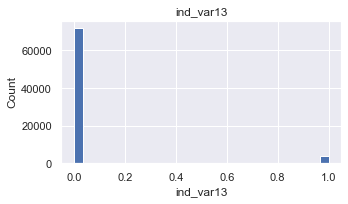

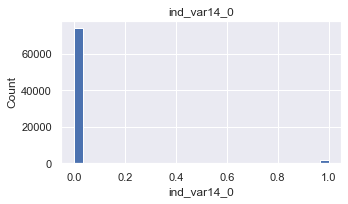

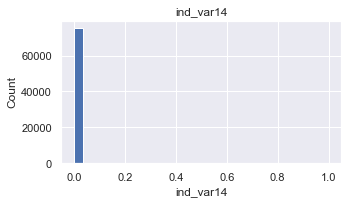

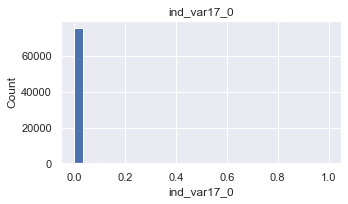

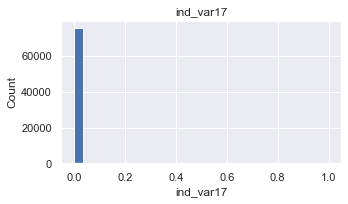

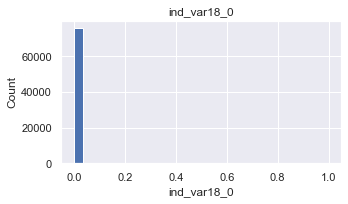

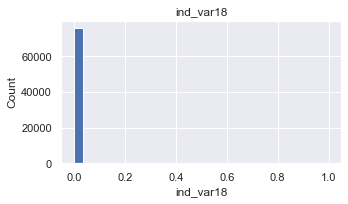

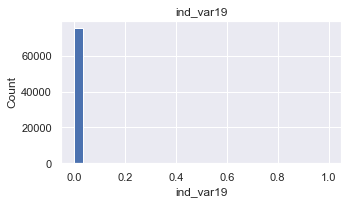

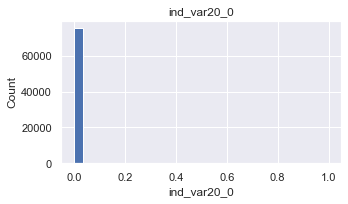

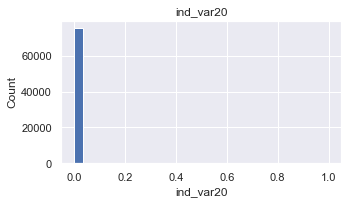

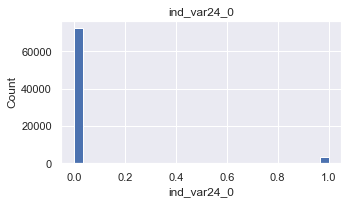

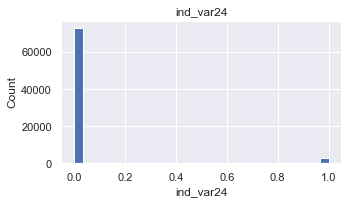

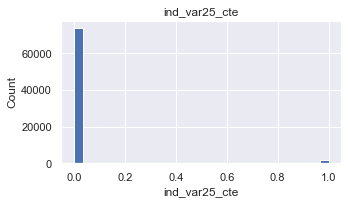

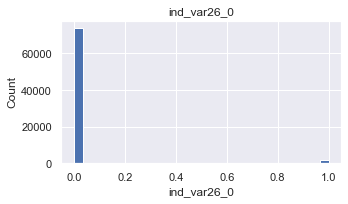

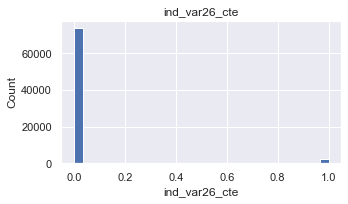

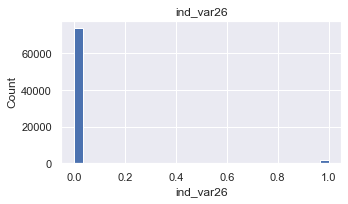

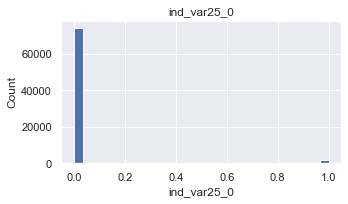

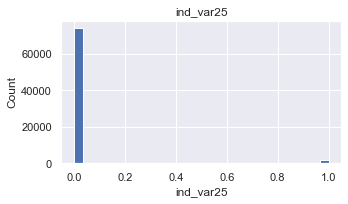

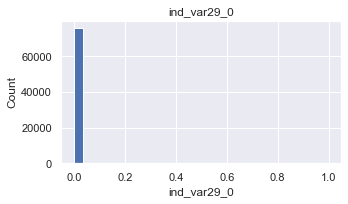

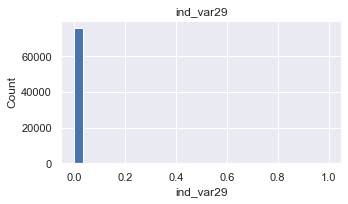

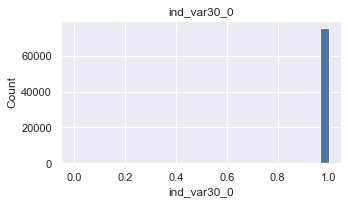

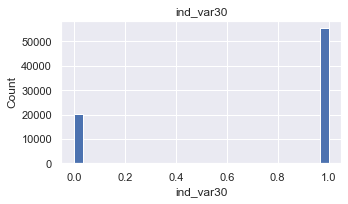

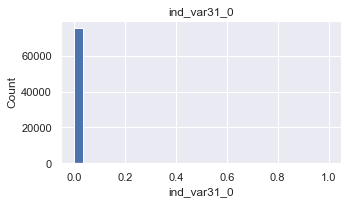

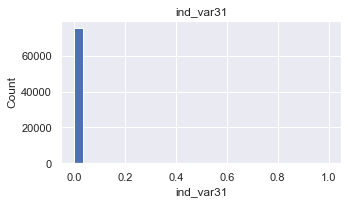

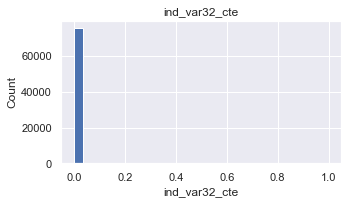

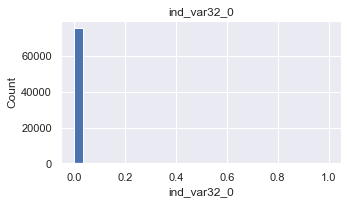

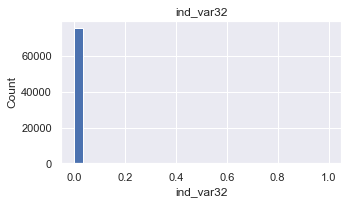

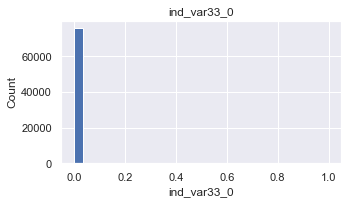

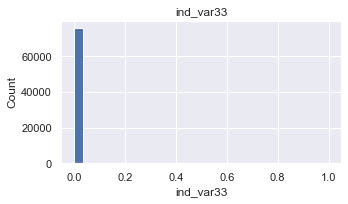

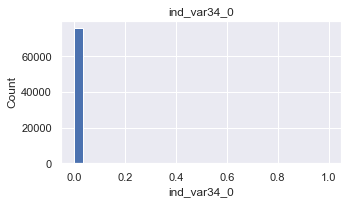

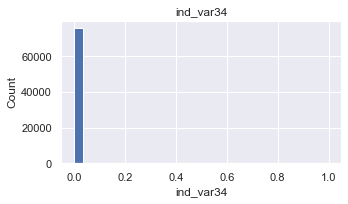

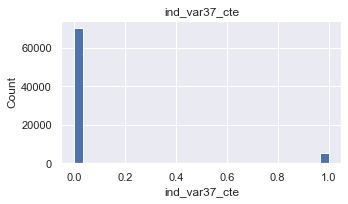

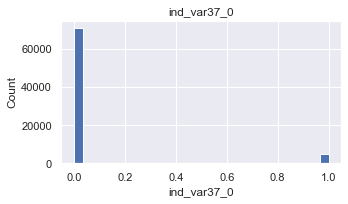

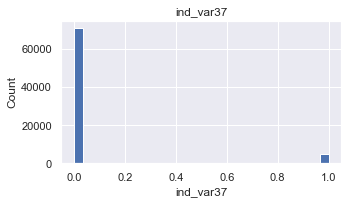

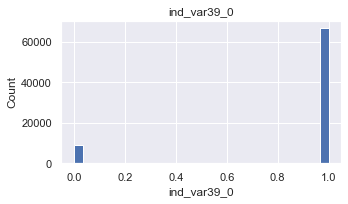

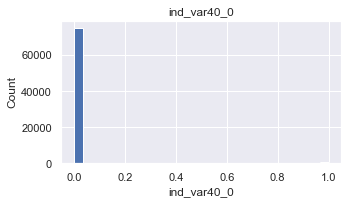

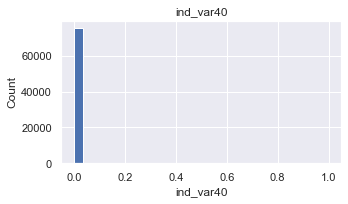

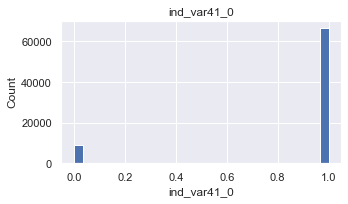

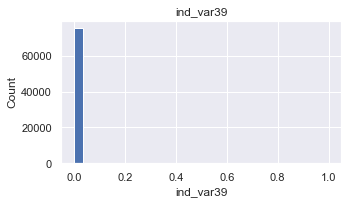

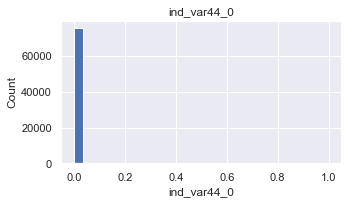

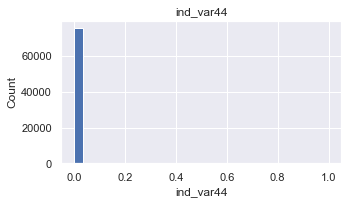

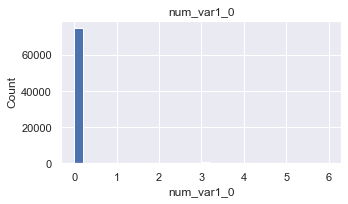

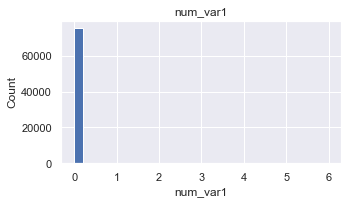

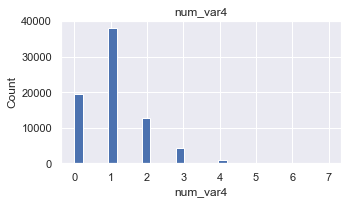

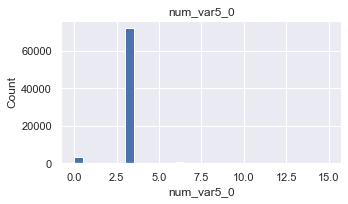

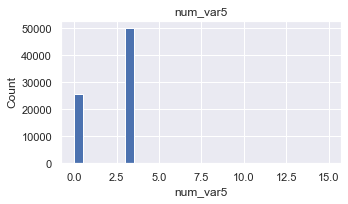

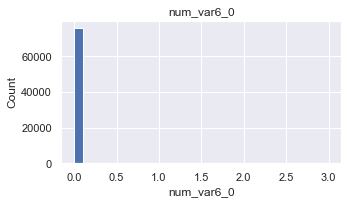

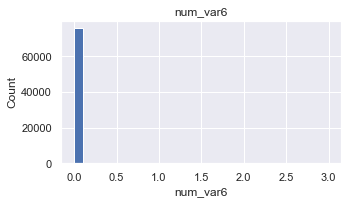

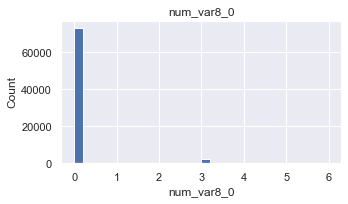

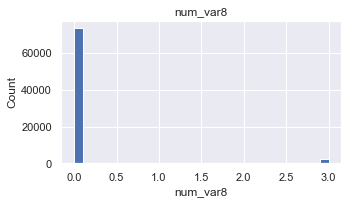

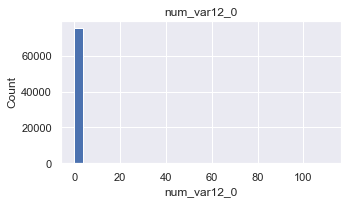

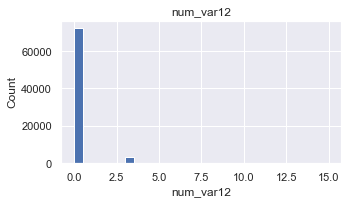

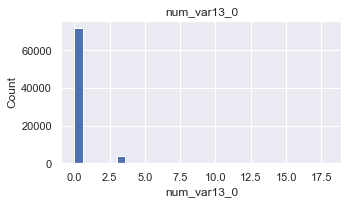

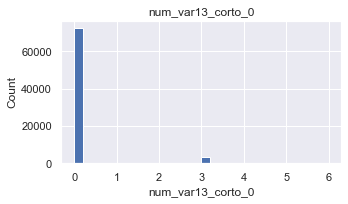

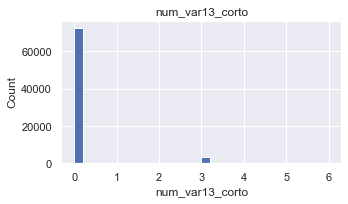

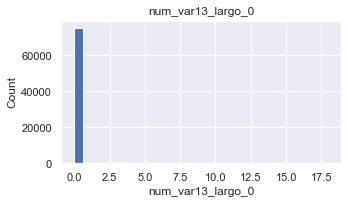

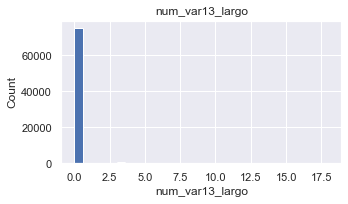

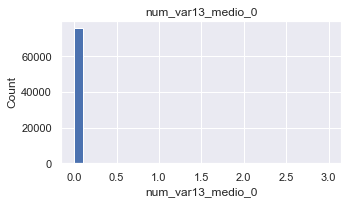

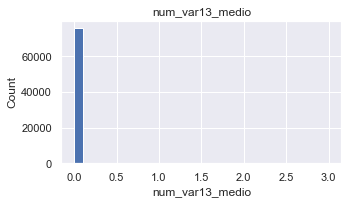

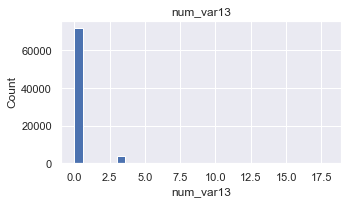

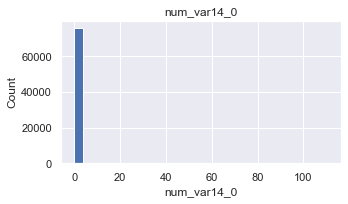

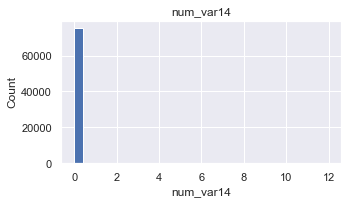

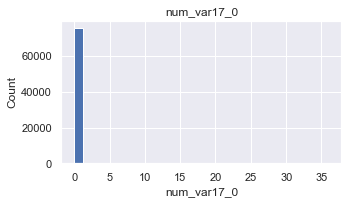

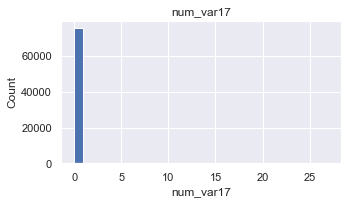

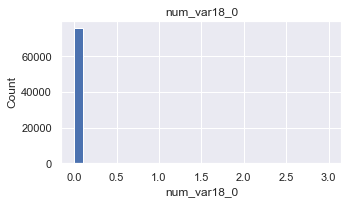

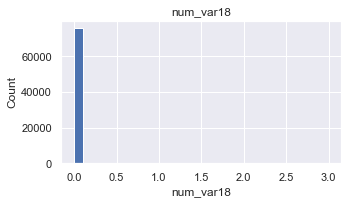

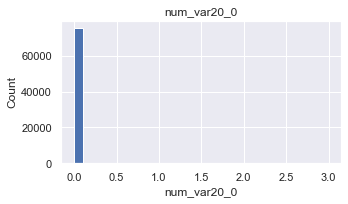

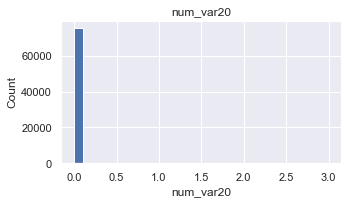

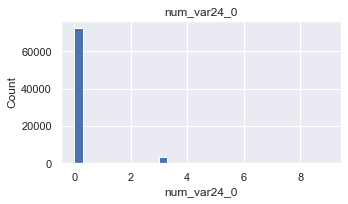

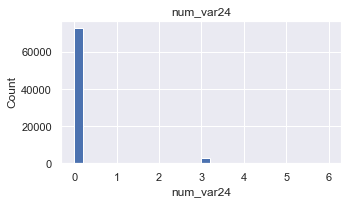

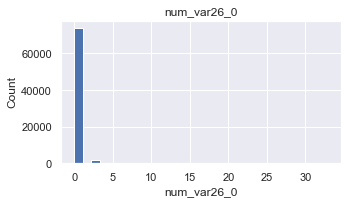

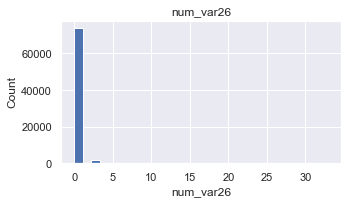

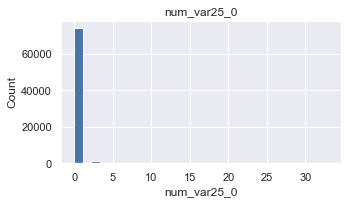

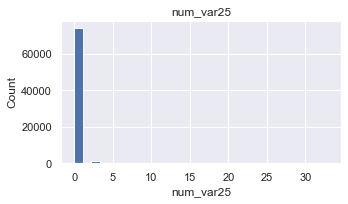

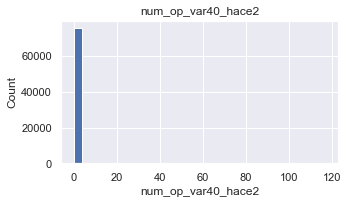

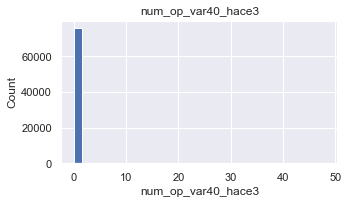

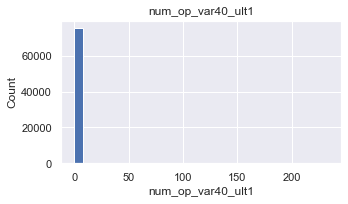

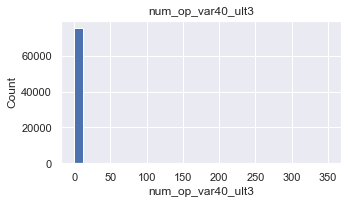

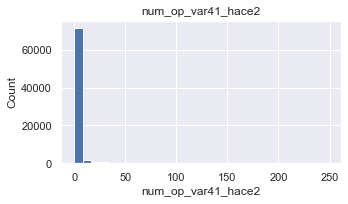

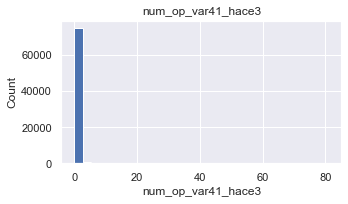

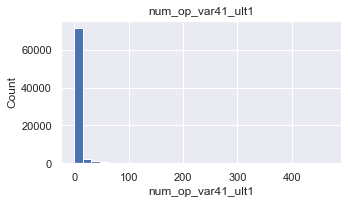

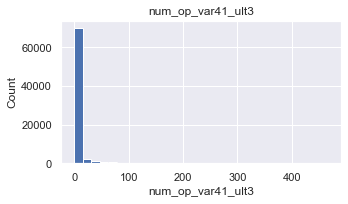

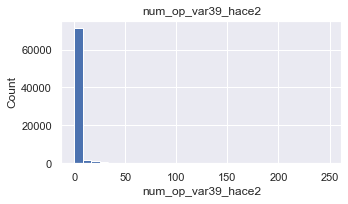

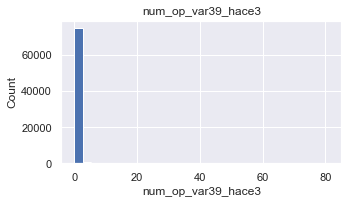

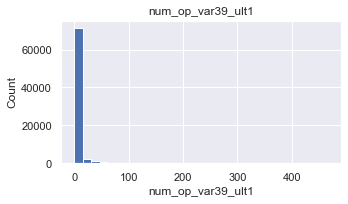

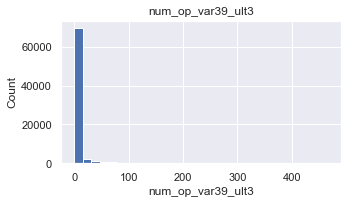

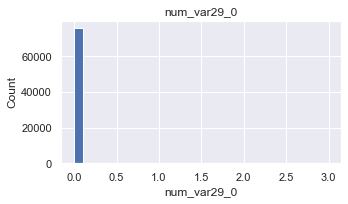

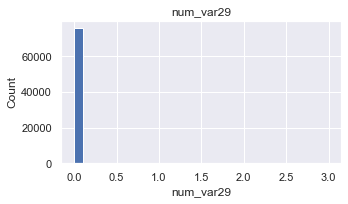

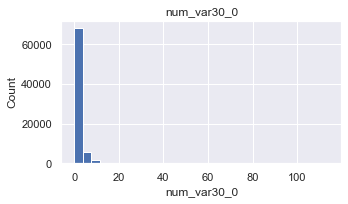

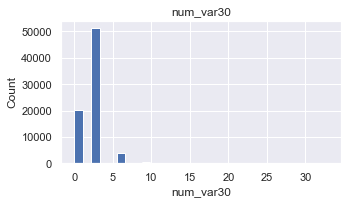

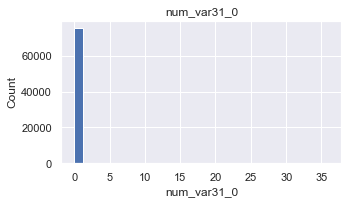

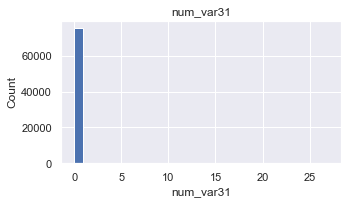

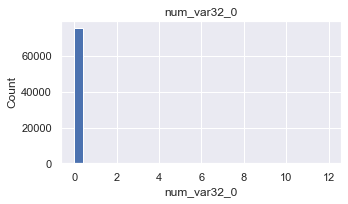

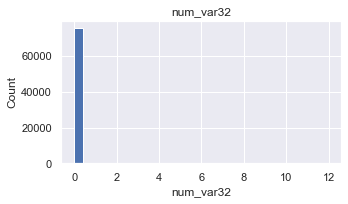

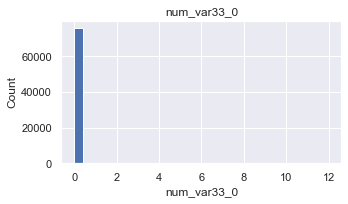

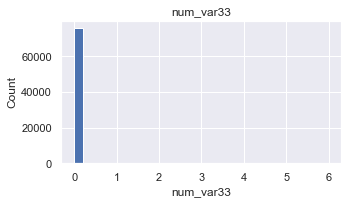

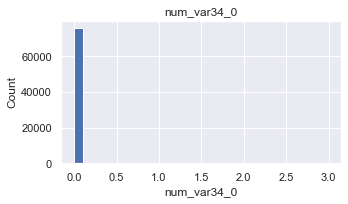

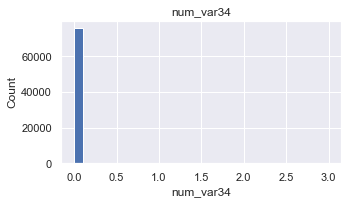

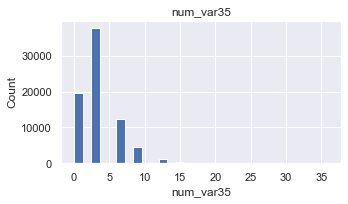

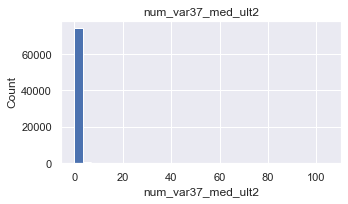

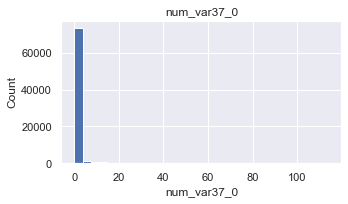

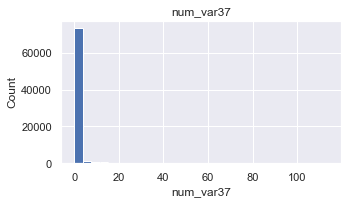

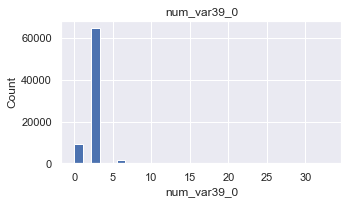

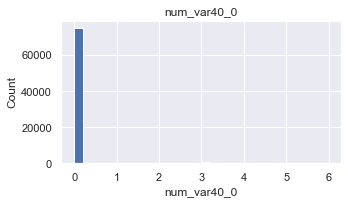

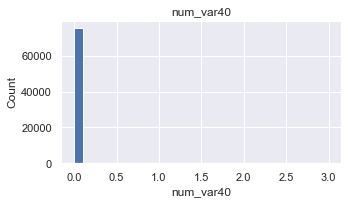

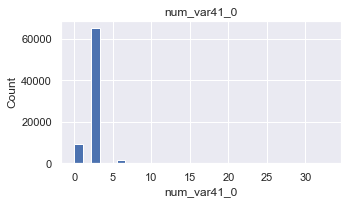

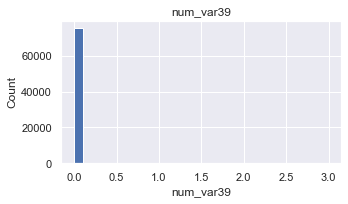

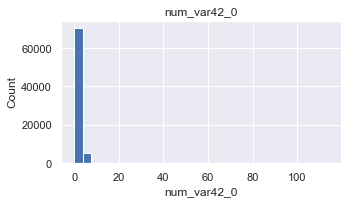

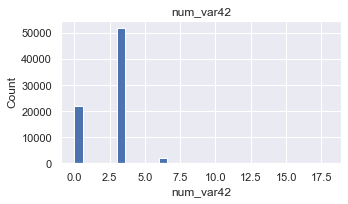

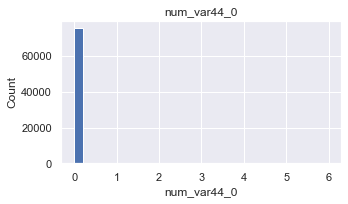

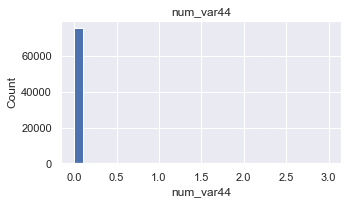

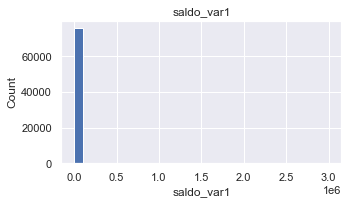

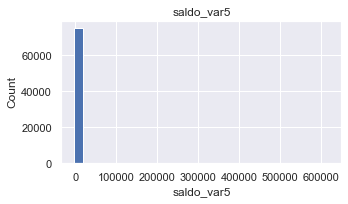

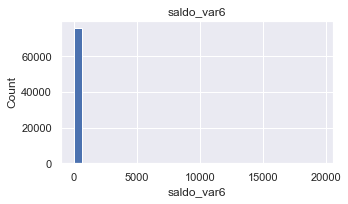

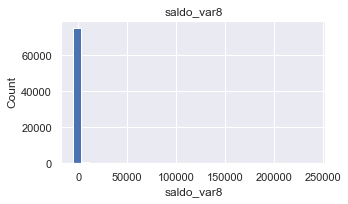

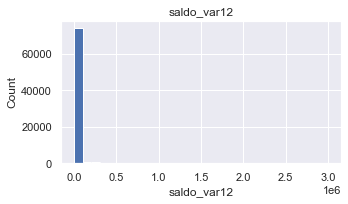

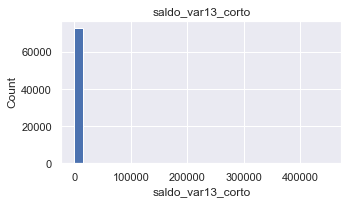

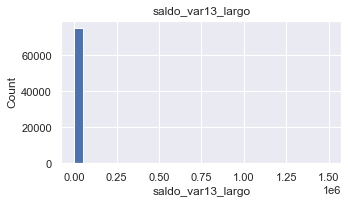

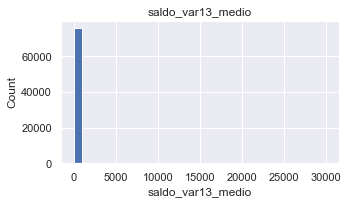

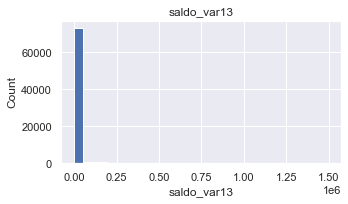

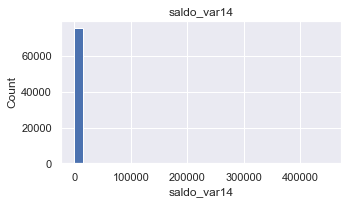

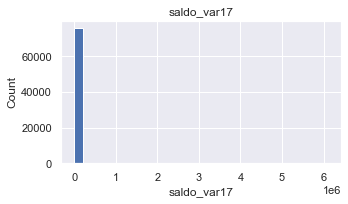

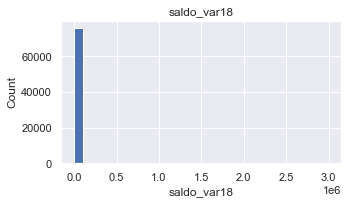

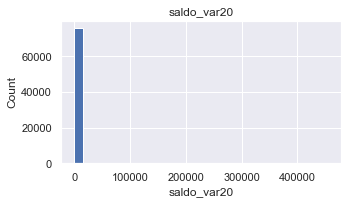

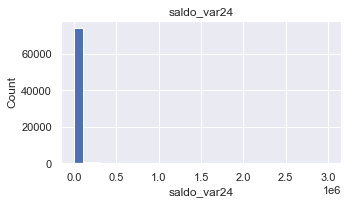

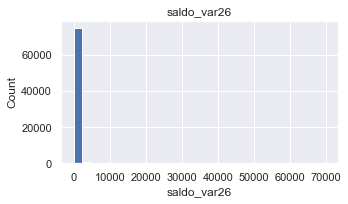

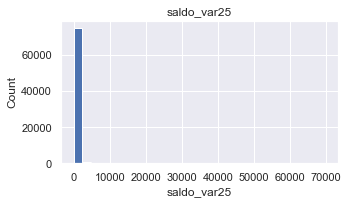

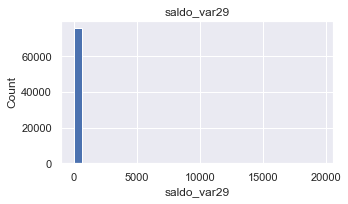

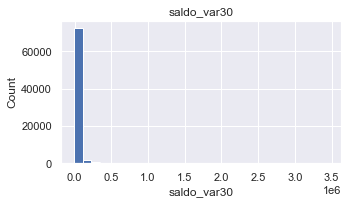

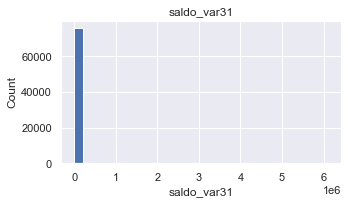

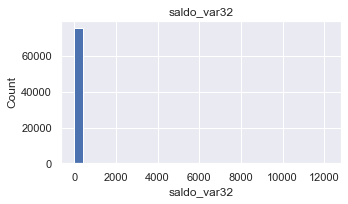

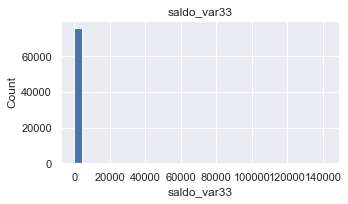

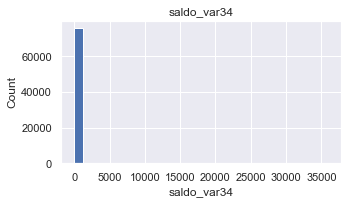

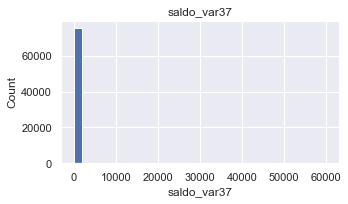

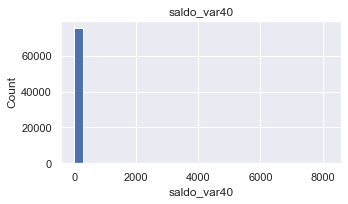

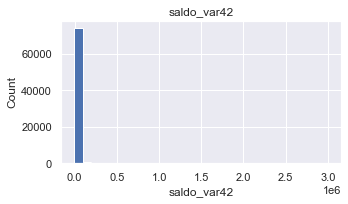

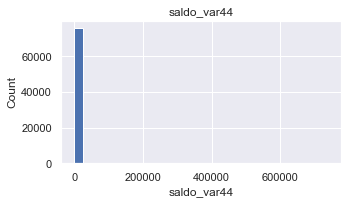

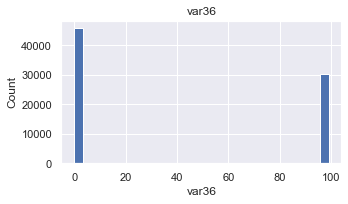

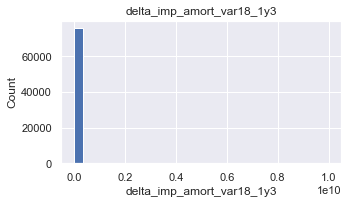

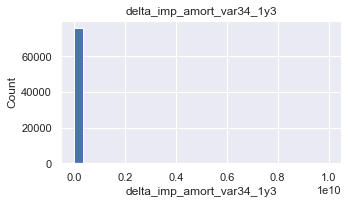

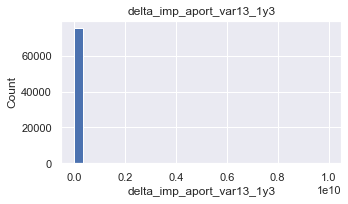

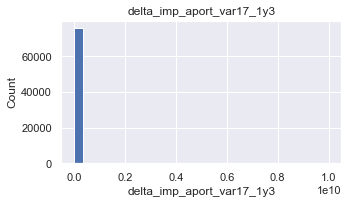

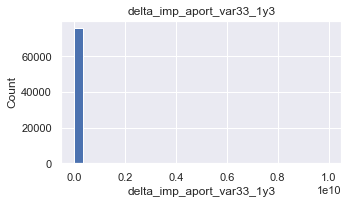

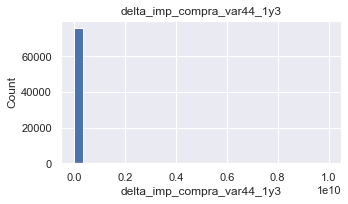

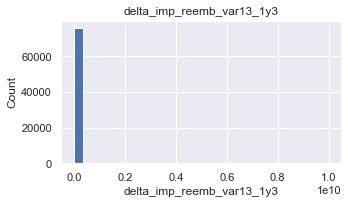

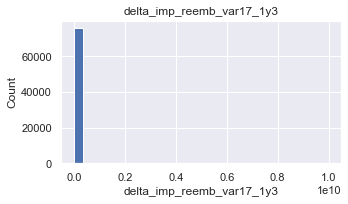

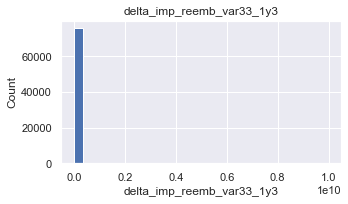

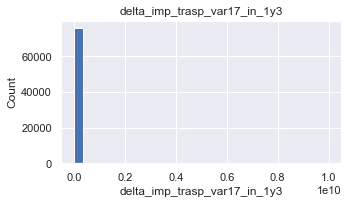

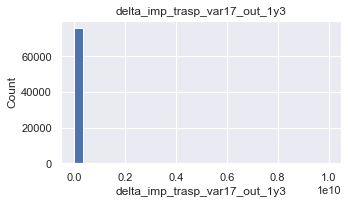

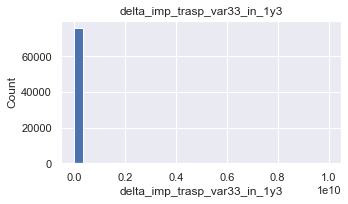

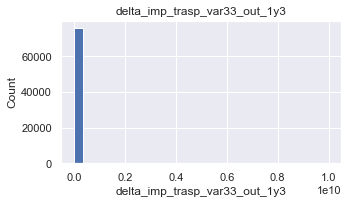

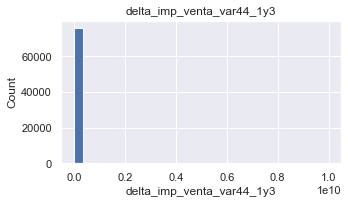

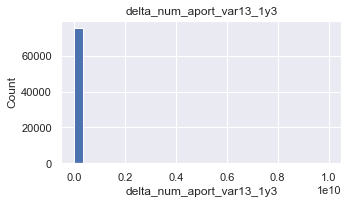

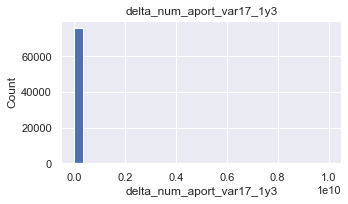

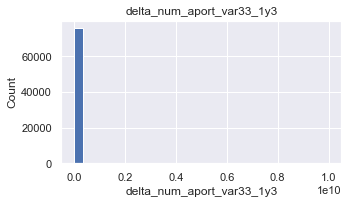

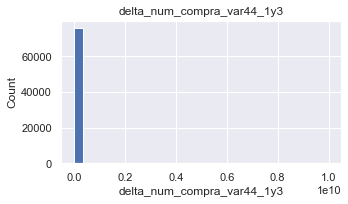

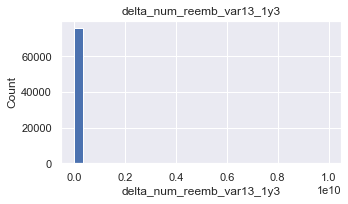

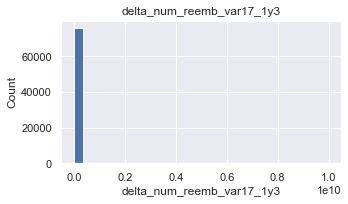

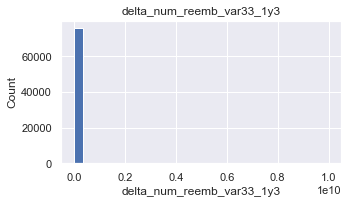

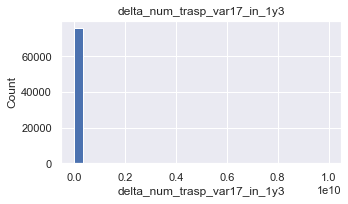

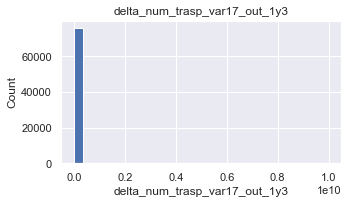

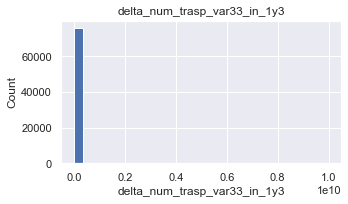

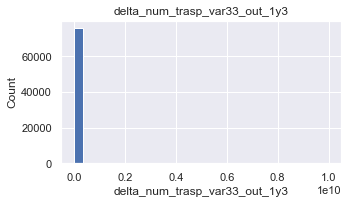

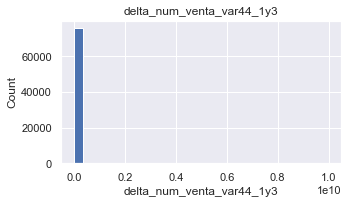

KeyboardInterrupt: 

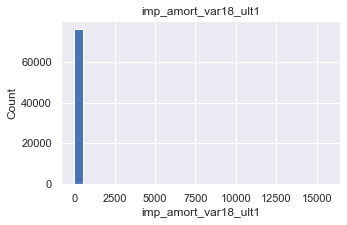

In [21]:
# Histogram of Each Feature
class color:
   BOLD = '\033[1m'
   END = '\033[0m'
for i, col in enumerate(train.columns):
    sns.set()
    plt.figure(figsize=(5,3)) 
    plt.hist(train[col], bins=30)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(col)
    plt.tight_layout()
    plt.show()

In [22]:
# Calculate correlation matrix
train.corr()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
var3,1.000000,-0.004452,0.001868,0.005989,0.006817,0.001518,0.001690,0.000530,0.000611,0.001311,...,0.000716,0.000491,0.000638,0.000669,0.000617,0.000508,0.000738,0.000778,0.000071,0.004475
var15,-0.004452,1.000000,0.043722,0.094762,0.101177,0.042754,0.048512,0.008805,0.009678,0.035884,...,0.029358,0.017264,0.028504,0.029176,0.029180,0.018884,0.032833,0.033597,0.006497,0.101322
imp_ent_var16_ult1,0.001868,0.043722,1.000000,0.041221,0.034879,0.009896,0.009377,0.000592,0.002510,0.011502,...,-0.000864,-0.000632,-0.000548,-0.000540,0.002655,-0.000612,0.005055,0.006590,0.000007,-0.000017
imp_op_var39_comer_ult1,0.005989,0.094762,0.041221,1.000000,0.886476,0.342709,0.295295,0.032280,0.054809,0.249247,...,0.016422,0.011719,0.012570,0.013703,0.009445,0.005532,0.011665,0.010802,0.012546,0.010353
imp_op_var39_comer_ult3,0.006817,0.101177,0.034879,0.886476,1.000000,0.316671,0.355670,0.029094,0.055449,0.247707,...,0.027489,0.021819,0.018427,0.020530,0.008539,0.006359,0.010660,0.009822,0.013271,0.003517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace3,0.000508,0.018884,-0.000612,0.005532,0.006359,-0.000480,-0.000529,-0.000170,-0.000195,-0.000417,...,-0.000219,-0.000151,-0.000196,-0.000205,0.332172,1.000000,0.229158,0.213191,0.003646,-0.002553
saldo_medio_var44_ult1,0.000738,0.032833,0.005055,0.011665,0.010660,-0.000254,-0.000510,-0.000254,-0.000292,-0.000260,...,0.000819,-0.000225,0.002493,0.002205,0.818300,0.229158,1.000000,0.968167,0.003258,-0.003104
saldo_medio_var44_ult3,0.000778,0.033597,0.006590,0.010802,0.009822,-0.000372,-0.000601,-0.000268,-0.000308,-0.000356,...,0.000977,-0.000238,0.002905,0.002574,0.710593,0.213191,0.968167,1.000000,0.003037,-0.003015
var38,0.000071,0.006497,0.000007,0.012546,0.013271,0.016628,0.015584,-0.000315,0.000682,0.003580,...,0.004448,0.001605,0.004255,0.004290,0.002889,0.003646,0.003258,0.003037,1.000000,-0.019510


### Step 3b: Issues with This Type of Data

- Too many zeros. How to handle?

- How to detect associations among any two combination? (EDA with no Target) 

- Association with Target Variable (so feature selection can be employed)

- When to Use and Why Association?
    - To measure association (chi-sq, RR, OR, conditional proportion etc.) between two categorical variables

- When to Use and Why Correlation?
    - To measure between two numerical linear relationships
    

- When to not Use?

- Alternatives?


### Search: Why Mr. B write this? Make critiques

Notice how we can't even see the correlation matrix for all of the variables due to large number of columns. We will try the following methods:
    1. Melt the data that will result into decrease in number of columns but increase in number of rows. 
    2. Shrink the size of the columns to the most important 10 features by using Univariate feature selection technique.

### Step 3c: Feature Importance and Selection

This is just one application. Many methods and approach exist. See Approaches to Feature Selection.doc

IN general, the choice of evaluation metric heavily influences the algorithm, and it is these evaluation metrics which distinguish between the three main categories of feature selection algorithms: 

- wrappers, 
- filters and 
- embedded methods.

Filters are most common and cheap:

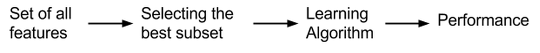

In [26]:
# Let's scale the featurs first: Why?
from sklearn.preprocessing import MinMaxScaler
x = train.drop(['TARGET'], axis=1)
y = train['TARGET']
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [27]:
# Apply SelectKBest class to extract the 10 features that best explains the association relationships between Target and Univariate feature (chi-squa results are ranked) 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 #see other options https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x_scaled, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(10, 'Score'))

                 Feature       Score
280  num_meses_var5_ult3  474.584918
24              ind_var5  468.257507
63             ind_var30  455.821225
193                var36  451.071536
27            ind_var8_0  160.110889
38             ind_var13  113.217189
31           ind_var13_0  112.246032
29           ind_var12_0  103.522051
90              num_var5   93.461748
33       ind_var13_corto   86.419227


In [37]:
columns_10best_chi = ['num_meses_var5_ult3', 'ind_var5', 'ind_var30', 
           'var36', 'ind_var8_0', 'ind_var13', 
           'ind_var13_0', 'ind_var12_0', 
          'num_var5', 'ind_var13_corto', 'TARGET']

In [38]:
# Now, we have 11+1 features from train set to proceed
sub_train = train[columns_10best_chi]

In [45]:
# And take the same features from test set
sub_test = test[columns_10best_chi]

KeyError: "['TARGET'] not in index"

In [ ]:
print(sub_train.shape, sub_test.shape)

In [40]:
sub_train.dtypes

num_meses_var5_ult3    int64
ind_var5               int64
ind_var30              int64
var36                  int64
ind_var8_0             int64
ind_var13              int64
ind_var13_0            int64
ind_var12_0            int64
num_var5               int64
ind_var13_corto        int64
TARGET                 int64
dtype: object

## Feature Elimination Techniques

Univariate Feature Selection from Scikit

    2.1. GenericUnivarietSelect
    2.2. SelectKBest
    2.3. SelectPercentile
    2.4. SelectFpr
    2.5. SelectFdr
    2.6. SelectFwe
    2.7. chi2
    2.8. f_classif
    2.9. f_regerssion
    2.10. mutual_info_classif
    2.11. mutual_info_regression
    
Also usefel methods below. Plase play wtih these codes. May need fixing:

0) Removing Constant Features
1) Removing Quasi-constant: Quasi-constant features are those that show the same value for the great majority of the observations of the dataset.
2) Removing Feature From Low Variance

In [48]:
# 0) Removing Constant Features
from sklearn.feature_selection import VarianceThreshold

# fit finds the features with zero variance
sel = VarianceThreshold(threshold=0)
sel.fit(train)
X1 = train.drop(columns=train.columns[~sel.get_support()])
X1t = test.drop(columns=test.columns[~sel.get_support()])

print(X1.shape)
print(X1t.shape)

#print(f'New sahape {X1.shape} number of feature removed {X_train.shape[1] - X1.shape[1]}')

IndexError: boolean index did not match indexed array along dimension 0; dimension is 369 but corresponding boolean dimension is 370

In [ ]:
# 1) Removing Quasi-constant: Quasi-constant features are those that show the same value for the great majority of the observations of the dataset.

sel_quasi = VarianceThreshold(threshold=0.01)  # 0.1 indicates 99% of observations approximately
sel_quasi.fit(X1)
X2 = X1.drop(columns=X1.columns[~sel_quasi.get_support()])
X2t = X1t.drop(columns=X1t.columns[~sel_quasi.get_support()])

print(f'New sahape {X2.shape} number of feature removed {X1.shape[1] - X2.shape[1]}')

In [ ]:
# 2) Removing Feature From Low Variance
#VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.
#As an example, suppose that we have a dataset with boolean features, and we want to remove all features that are either one or zero (on or off) in more than 80% of the samples. Boolean features are Bernoulli random variables, and the variance of such variables is given by
#so we can select using the threshold .8 * (1 - .8):

from sklearn.feature_selection import VarianceThreshold

# First Example 
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

print(f'Variance value per columng {sel.variances_}, threshold {sel.threshold : 2.2f}')

sel = VarianceThreshold(threshold=0.01)
result = pd.DataFrame(sel.fit_transform(df_train))

sel.variances_

# Find the remaining column id
remain_features_id = np.where(sel.variances_ > sel.threshold)

# Assign remaining column name
result.columns = df_train.columns[remain_features_id]

result

## Discussion
Are all of these categorical variables? is it a problem when building predictive modeling?

## Need Powerful Tools and Packs

### Package 1: Pandas-Profiling

Import the pack or upoad it from https://github.com/pandas-profiling/pandas-profiling.

Shortly, this generates profile reports from a pandas DataFrame. The pandas df.describe() function is great but a little basic for serious exploratory data analysis. pandas_profiling extends the pandas DataFrame with df.profile_report() for quick data analysis.


In [31]:
# Install here or using pip: >> pip install pandas-profiling
from pandas_profiling import ProfileReport

In [ ]:
# No need if not running
sub_train.profile_report(style={‘full_width’:True})

In [34]:
profile = ProfileReport(sub_train, title="Pandas Profiling Report")
print(profile)

In [35]:
profile.to_widgets()

,ID,num_meses_var5_ult3,ind_var5,ind_var30,var36,ind_var8_0,ind_var13,ind_var13_0,ind_var12_0,num_var5,ind_var13_corto
0,1,0,0,0,99,0,0,0,0,0,0
1,3,1,0,1,3,0,1,1,0,0,1
2,4,3,1,1,99,0,0,0,0,3,0
3,8,2,1,1,2,0,0,0,0,3,0
4,10,3,0,1,1,0,0,0,1,0,0
5,13,0,0,0,99,0,0,0,0,0,0
6,14,3,1,1,3,0,0,0,0,3,0
7,18,2,1,1,2,0,0,0,0,3,0
8,20,0,0,0,99,0,0,0,0,0,0
9,23,2,1,1,2,0,0,0,0,3,0


,ID,num_meses_var5_ult3,ind_var5,ind_var30,var36,ind_var8_0,ind_var13,ind_var13_0,ind_var12_0,num_var5,ind_var13_corto
76010,151816,0,0,0,99,0,0,0,0,0,0
76011,151818,2,0,1,3,1,0,0,0,0,0
76012,151820,3,1,1,2,0,0,0,0,3,0
76013,151821,3,1,1,1,0,0,0,0,3,0
76014,151825,3,1,1,1,0,0,0,0,3,0
76015,151829,0,0,0,99,0,0,0,0,0,0
76016,151830,1,0,1,2,0,0,0,1,0,0
76017,151835,2,1,1,99,0,0,0,0,3,0
76018,151836,3,1,1,99,0,0,0,0,3,0
76019,151838,0,0,0,99,0,0,0,0,0,0


In [36]:
profile.to_file("your_report.html")

__NOTE__: Pandas-profiling may NOT process the data due to its size and not enough compute resource

### Package 2:  ClfAutoEDA

- Read the article https://medium.com/analytics-vidhya/automated-eda-for-classification-77c25b847e43
- Download the py code in the directory you are working: https://github.com/jatinkataria94/EDA-Classification/blob/master/ClfAutoEDA.py

In [41]:
# import the autoEDA module
from ClfAutoEDA import *

In [42]:
sub_train.shape

(76020, 11)

The data looks like this: 
     num_meses_var5_ult3  ind_var5  ind_var30  var36  ind_var8_0  ind_var13  \
ID                                                                           
1                     0         0          0     99           0          0   
3                     1         0          1      3           0          1   
4                     3         1          1     99           0          0   
8                     2         1          1      2           0          0   
10                    3         0          1      1           0          0   

    ind_var13_0  ind_var12_0  num_var5  ind_var13_corto  TARGET  
ID                                                               
1             0            0         0                0       0  
3             1            0         0                1       0  
4             0            0         3                0       0  
8             0            0         3                0       0  
10            0            1 

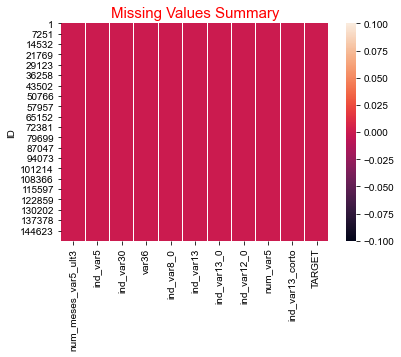

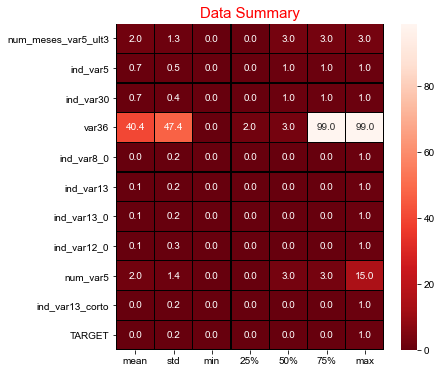

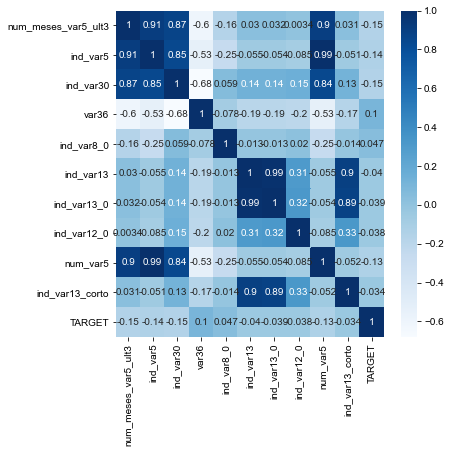

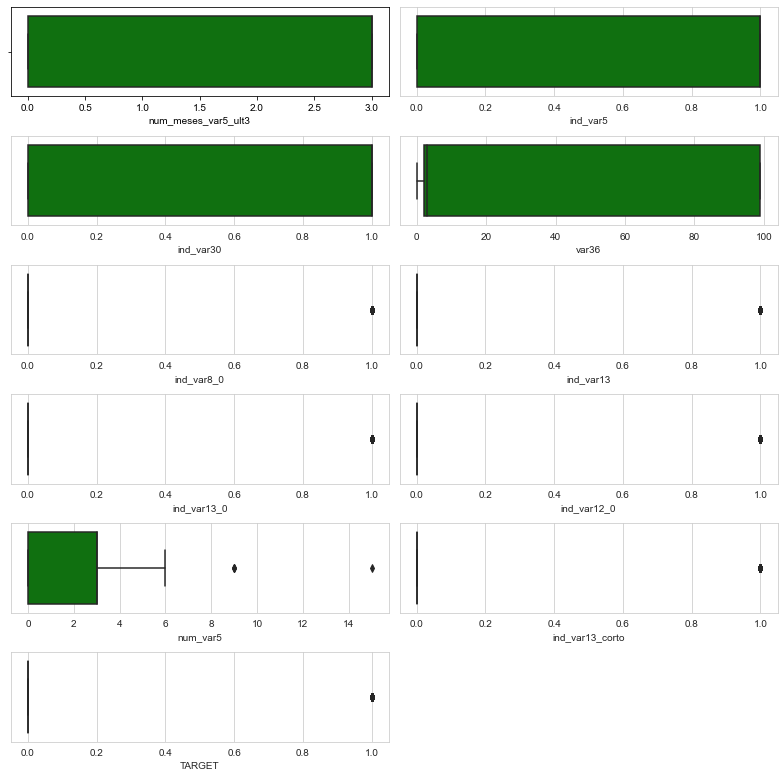

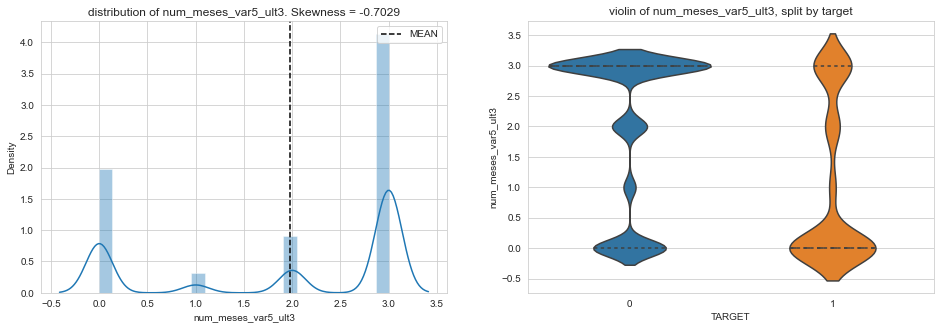

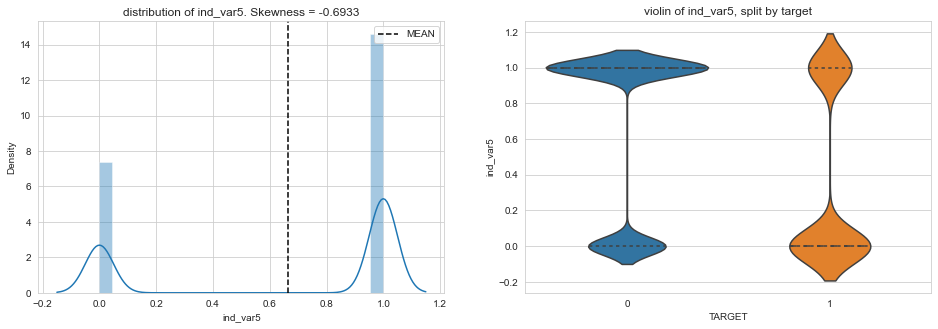

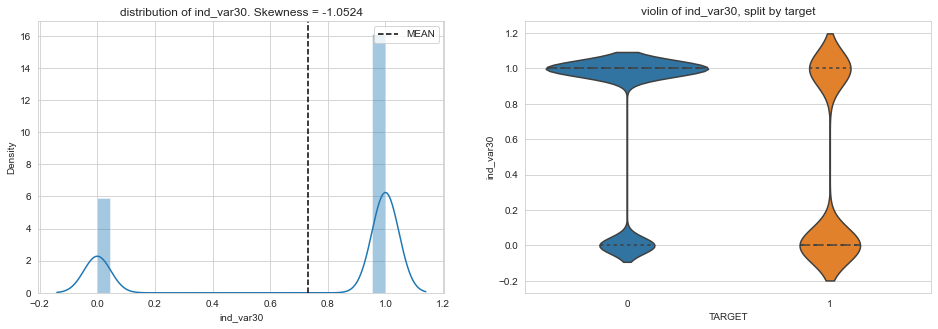

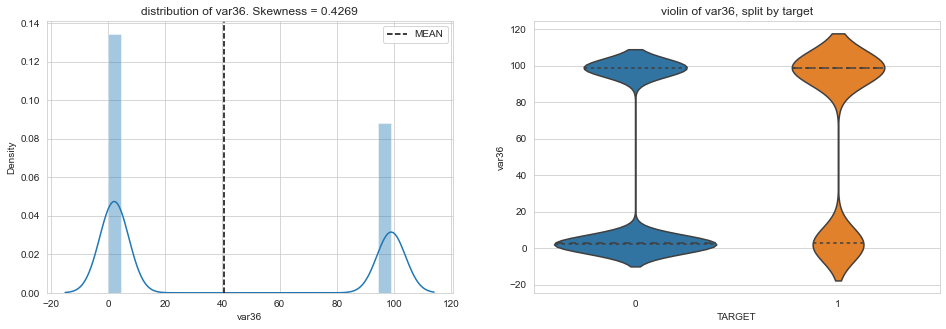

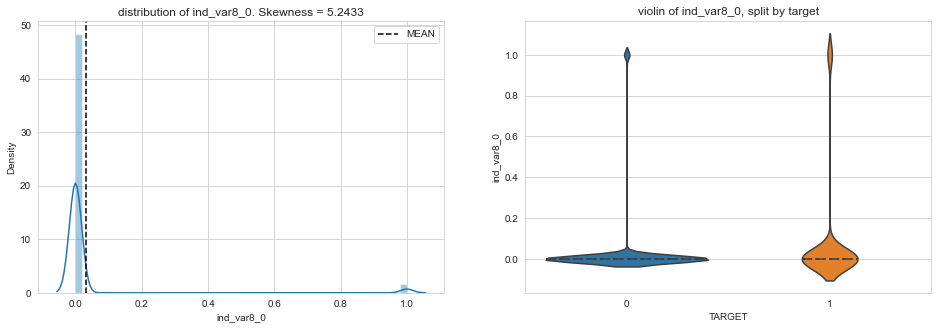

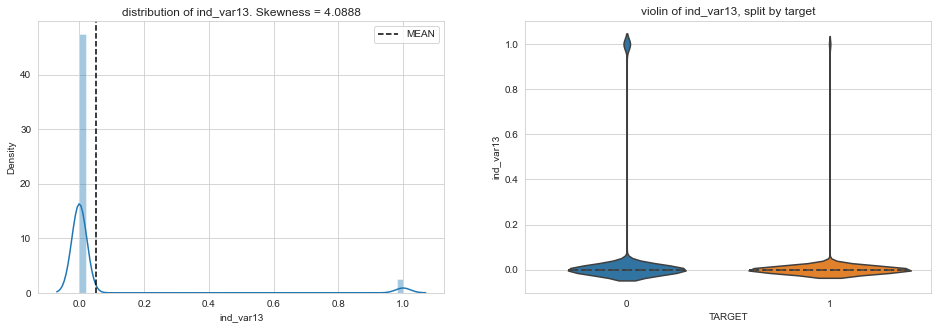

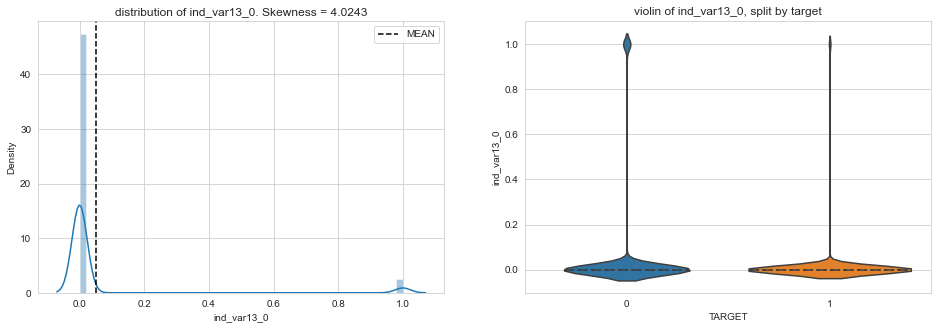

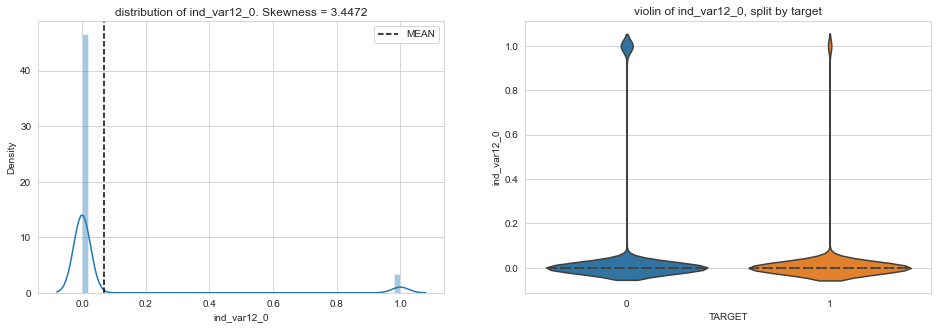

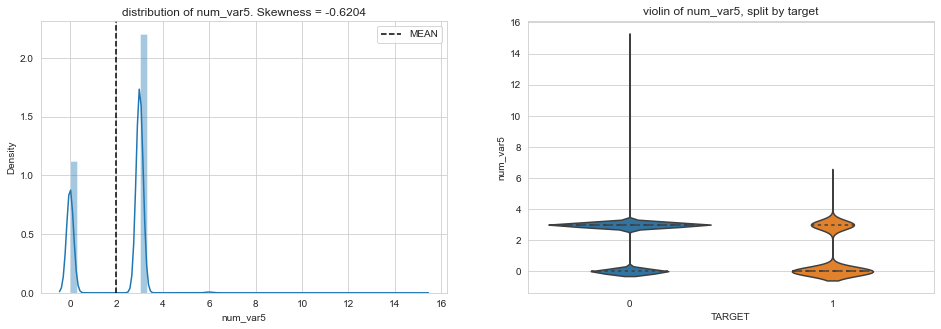

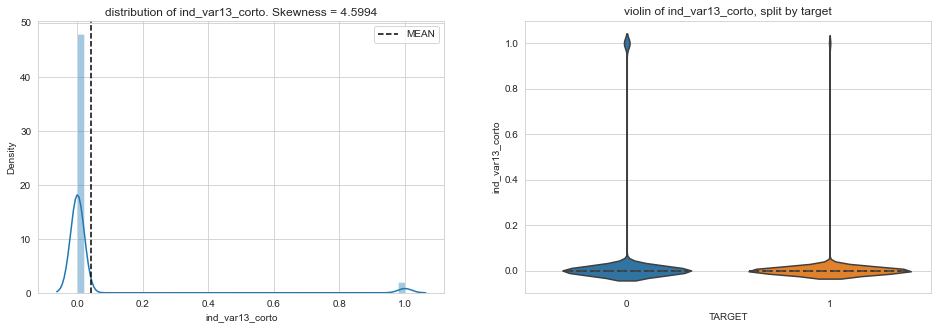

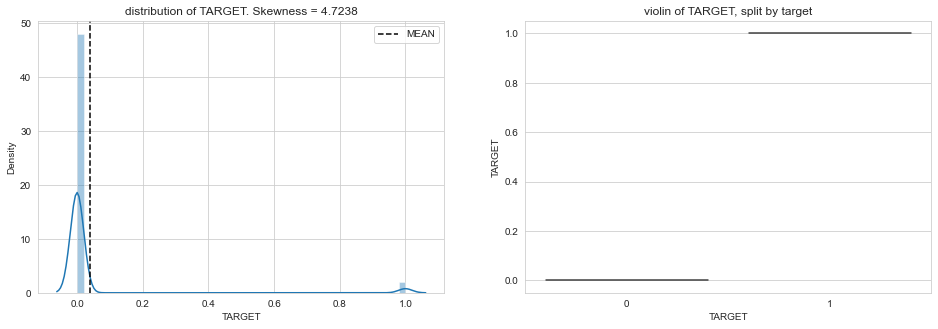

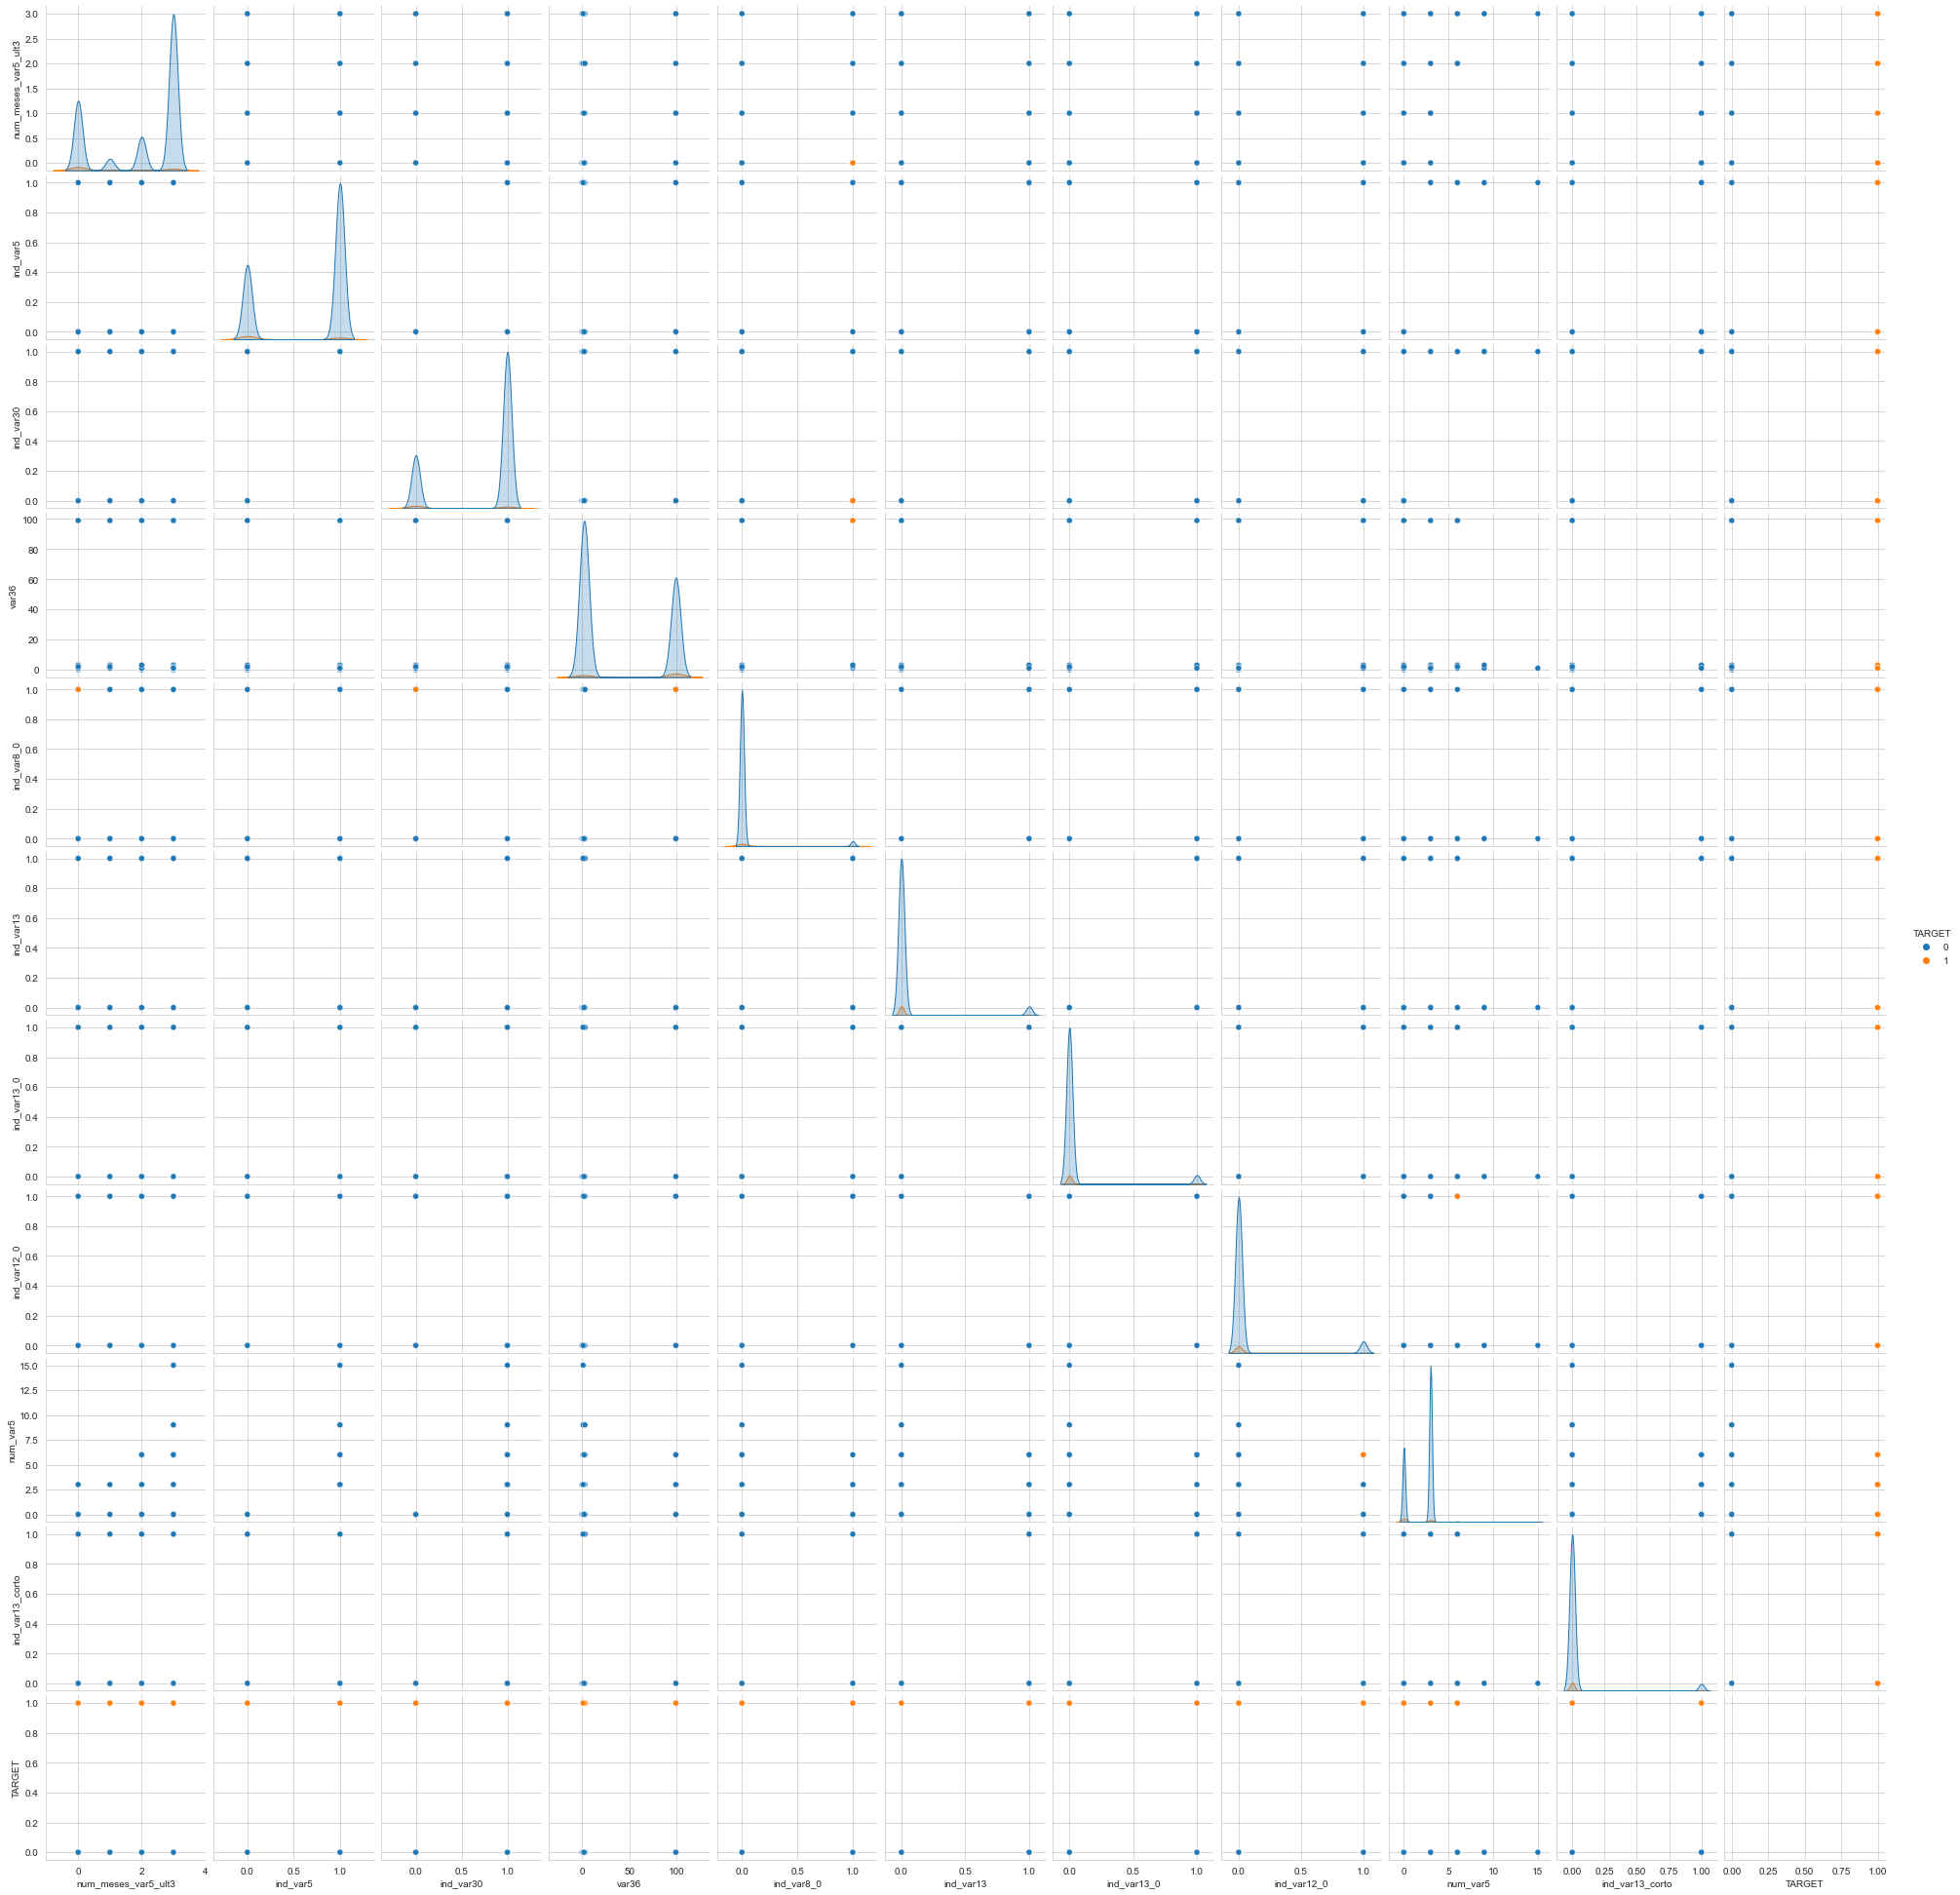

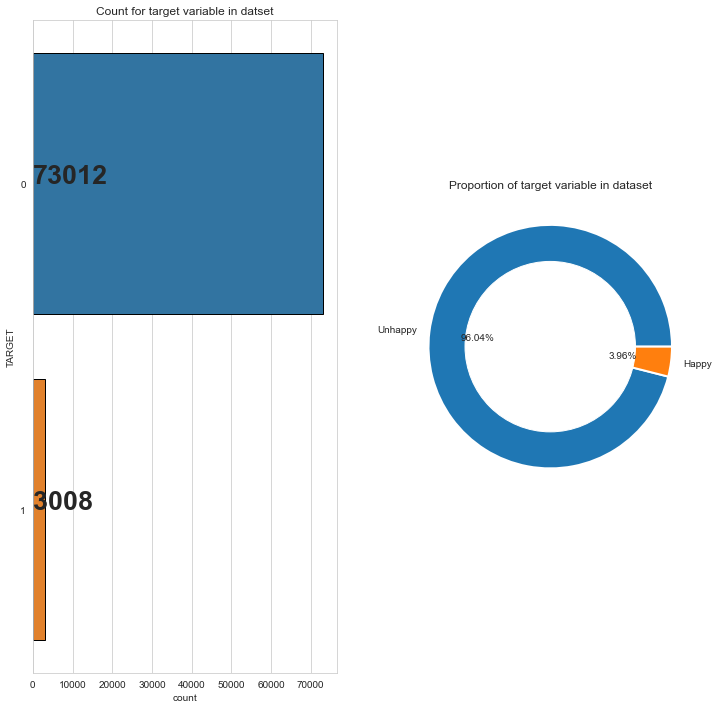

In [43]:
#Just play with small data portion
#Setting parameter values
target_variable_name='TARGET'
labels=['Unhappy','Happy']
#Calling EDA function with parameters of choice
df_processed,num_features,cat_features=EDA(df=sub_train,labels=labels,
                                         target_variable_name=target_variable_name,
                                         data_summary_figsize=(6,6),
                                         corr_matrix_figsize=(6,6), 
                                         corr_matrix_annot=True,
                                         pairplt=True)

__NOTE__: Pandas-profiling couldn't process the data due to its size and not enough compute resource

## Pack 3. Sweetviz

Read the article https://towardsdatascience.com/powerful-eda-exploratory-data-analysis-in-just-two-lines-of-code-using-sweetviz-6c943d32f34

Install it using pip install sweetviz and run the next.

In [44]:
import sweetviz

In [ ]:
#This will tke too much time if 
my_report = sweetviz.compare([sub_train, "Train"], [sub_test, "Test"], "TARGET")

In [7]:
my_report.show_html("Report.html") # Not providing a filename will default to SWEETVIZ_REPORT.html

Report Report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


## Pack 4. Pycaret

A complex level pack that does all!

Read the article https://github.com/pycaret/pycaret and examples https://github.com/pycaret/pycaret/tree/master/examples.

Install it using pip install pycaret.

Practice it with the dataset here.

# More Resources to Practice
- https://www.kaggle.com/c/santander-customer-satisfaction and see many notebooks prepared
- https://www.kaggle.com/cast42/exploring-features ==> nice notebook to practice
